In [37]:
import pandas as pd
from dowhy import CausalModel
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [38]:
df = pd.read_csv("C:/Users/hanch/OneDrive/Desktop/research/NHEFS/NHEFS.csv")

covariates = [
    "qsmk",
    "wt82_71",
    "sex",
    "age",
    "race",
    "education",
    "smokeintensity",
    "smokeyrs",
    "active",
    "exercise",
    "wt71"
]

df = df[covariates]
df = df.dropna(subset=["qsmk", "wt82_71"])


In [39]:
data = {
    "data": df,
    "treatment": ["qsmk"],
    "outcome": ["wt82_71"],
    "graph": """
        graph[directed 1
            node[ id "wt82_71" label "wt82_71"]
            node[ id "qsmk" label "qsmk"]
            node[ id "age" label "age"]
            node[ id "sex" label "sex"]
            node[ id "race" label "race"]
            node[ id "education" label "education"]
            node[ id "smokeintensity" label "smokeintensity"]
            node[ id "smokeyrs" label "smokeyrs"]
            node[ id "exercise" label "exercise"]
            node[ id "active" label "active"]
            node[ id "wt71" label "wt71"]
            
            edge[ source "qsmk" target "wt82_71"]

            edge[ source "age" target "qsmk"]
            edge[ source "sex" target "qsmk"]
            edge[ source "race" target "qsmk"]
            edge[ source "education" target "qsmk"]
            edge[ source "smokeintensity" target "qsmk"]
            edge[ source "smokeyrs" target "qsmk"]
            edge[ source "exercise" target "qsmk"]
            edge[ source "active" target "qsmk"]
            edge[ source "wt71" target "qsmk"]
            
            edge[ source "age" target "wt82_71"]
            edge[ source "sex" target "wt82_71"]
            edge[ source "race" target "wt82_71"]
            edge[ source "education" target "wt82_71"]
            edge[ source "smokeintensity" target "wt82_71"]
            edge[ source "smokeyrs" target "wt82_71"]
            edge[ source "exercise" target "wt82_71"]
            edge[ source "active" target "wt82_71"]
            edge[ source "wt71" target "wt82_71"]
        ]
        """


}


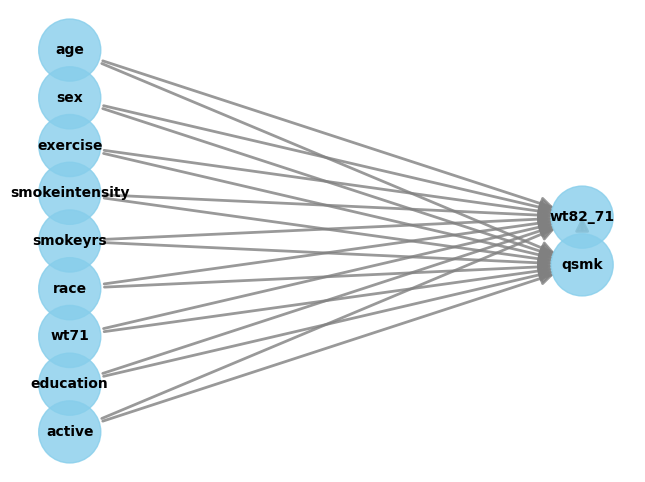

In [40]:
model = CausalModel(
    data = df,
    treatment = data["treatment"],
    outcome = data["outcome"],
    graph = data["graph"]
)

model.view_model()

In [41]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable = True)
print(identified_estimand.get_backdoor_variables())
print()
print(identified_estimand)

['active', 'education', 'wt71', 'smokeyrs', 'race', 'smokeintensity', 'exercise', 'sex', 'age']

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
───────(E[wt_82_71|active,education,wt71,smokeyrs,race,smokeintensity,exercise ↪
d[qsmk]                                                                        ↪

↪           
↪ ,sex,age])
↪           
Estimand assumption 1, Unconfoundedness: If U→{qsmk} and U→wt82_71 then P(wt82_71|qsmk,active,education,wt71,smokeyrs,race,smokeintensity,exercise,sex,age,U) = P(wt82_71|qsmk,active,education,wt71,smokeyrs,race,smokeintensity,exercise,sex,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                                         

In [42]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate.value)
print(causal_estimate.get_confidence_intervals())

2.847531605617157


d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1.5261747416281954, 3.6893453406571926)


In [43]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_weighting")
print(causal_estimate.value)
print(causal_estimate.get_confidence_intervals(confidence_level=0.95))

3.0492161279461163
(1.8091626000467347, 4.131974334633712)


In [44]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate.value)
print(causal_estimate.get_confidence_intervals(confidence_level=0.95))

3.053581757739464
(1.8417518034674343, 4.223876349393359)


In [45]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate.value)
print(causal_estimate.get_confidence_intervals(confidence_level=0.95))

3.3488237857996013
[[2.48304875 4.21459882]]


In [46]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.generalized_linear_model",
           method_params={
            "glm_family": sm.families.Gaussian()
        }
    )
print(causal_estimate.value)
print(causal_estimate.get_confidence_intervals(confidence_level=0.95))

3.3488237857996013
(2.4660972149218328, 4.335537013858255)
